# Proyecto Final Con PlusTi Priorizar fraudes repetidos en un mismo comercio
### Enfocar detección en comercios donde ha habido múltiples fraudes previos.
### Security Data Science
### Universidad del valle de Guatemala

Abner Ivan Garcia - 21285

In [54]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Cargamos el dataset

In [28]:
df = pd.read_csv("dataset_feature_engineering.csv", header=0)
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


#### Información del dataset y análisis exploratorio

In [29]:
df.shape

(1852394, 35)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

In [31]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,count_month_shopping_net,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,...,4.567241e+00,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,...,4.575502e+00,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,...,0.000000e+00,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,...,1.000000e+00,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,...,3.000000e+00,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,...,7.000000e+00,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,4.800000e+01,1.518682e+02,1.200000e+01,6.000000e+00,2.300000e+01,2.020000e+03,2.800000e+01,1.700000e+01,9.000000e+00,9.000000e+00


### ✅ 1.3 Verificar Rango de Fechas

In [33]:
print("Años disponibles:", df['year'].unique())
print("Meses disponibles:", df['trans_month'].unique())



Años disponibles: [2019 2020]
Meses disponibles: [ 1  2  3  4  5  6  7  8  9 10 11 12]


### ✅ 1.4 Análisis de la Variable Objetivo (is_fraud)

In [34]:
fraud_dist = df['is_fraud'].value_counts().rename({0: 'No Fraude', 1: 'Fraude'})
fraud_percent = (fraud_dist / fraud_dist.sum()) * 100

fraud_df = pd.DataFrame({
    'Cantidad': fraud_dist,
    'Porcentaje': fraud_percent.round(2)
})
fraud_df


,Cantidad,Porcentaje
is_fraud,,
No Fraude,1842743,99.48
Fraude,9651,0.52


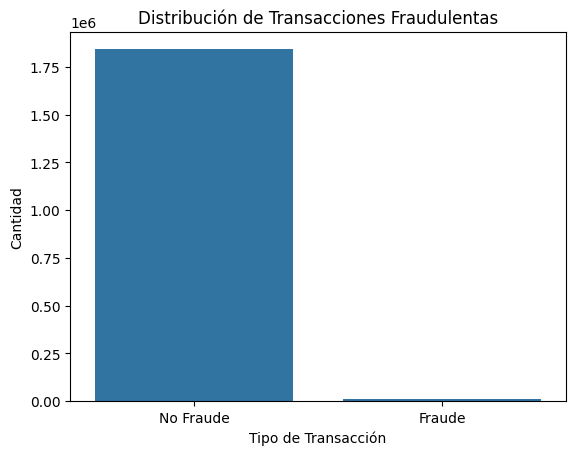

In [35]:
sns.countplot(x='is_fraud', data=df)
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.title("Distribución de Transacciones Fraudulentas")
plt.xlabel("Tipo de Transacción")
plt.ylabel("Cantidad")
plt.show()


### ✅ 1.5 Evolución del Fraude por Año

In [36]:
df_yearly = df.groupby(['year', 'is_fraud']).size().unstack().fillna(0)
df_yearly.columns = ['No Fraude', 'Fraude']
df_yearly['Total'] = df_yearly.sum(axis=1)
df_yearly['% Fraude'] = (df_yearly['Fraude'] / df_yearly['Total'] * 100).round(2)

df_yearly


,No Fraude,Fraude,Total,% Fraude
year,,,,
2019,919630,5220,924850,0.56
2020,923113,4431,927544,0.48


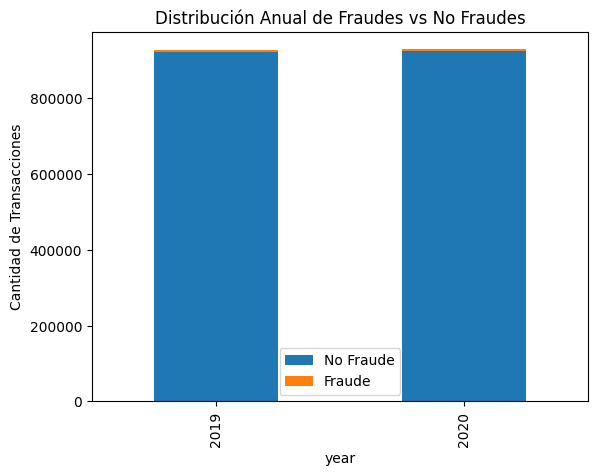

In [37]:
df_yearly[['No Fraude', 'Fraude']].plot(kind='bar', stacked=True)
plt.title("Distribución Anual de Fraudes vs No Fraudes")
plt.ylabel("Cantidad de Transacciones")
plt.show()


### ✅ 1.6 Análisis de top 10 Comercios Más Sospechosos en cada año

In [47]:
# Group fraudulent transactions by year and merchant
fraud_by_year = df[df['is_fraud'] == 1].groupby([df['year'], 'merchant'])['merchant'].count().reset_index(name='Cantidad de Fraudes')

# Get top 10 merchants for each year
top_merchants_by_year = fraud_by_year.sort_values(['year', 'Cantidad de Fraudes'], ascending=[True, False]).groupby('year').head(10)

# Display results for each year
for year in top_merchants_by_year['year'].unique():
    print(f"\nTop 10 Comercios con más fraudes en {year}:")
    year_data = top_merchants_by_year[top_merchants_by_year['year'] == year]
    print(year_data[['merchant', 'Cantidad de Fraudes']].to_string(index=False))    


Top 10 Comercios con más fraudes en 2019:
                merchant  Cantidad de Fraudes
      fraud_Hudson-Ratke                   37
       fraud_Kilback LLC                   35
      fraud_Rau and Sons                   33
       fraud_Cormier LLC                   32
fraud_Gleason-Macejkovic                   32
     fraud_Koepp-Witting                   32
          fraud_Kuhn LLC                   32
    fraud_Boyer-Reichert                   31
    fraud_Kiehn-Emmerich                   31
         fraud_Kuhic LLC                   31

Top 10 Comercios con más fraudes en 2020:
                            merchant  Cantidad de Fraudes
                     fraud_Doyle Ltd                   33
                     fraud_Kiehn Inc                   30
                   fraud_Kozey-Boehm                   30
fraud_Langworth, Boehm and Gulgowski                   29
      fraud_Moen, Reinger and Murphy                   29
               fraud_Kerluke-Abshire                   28
 f

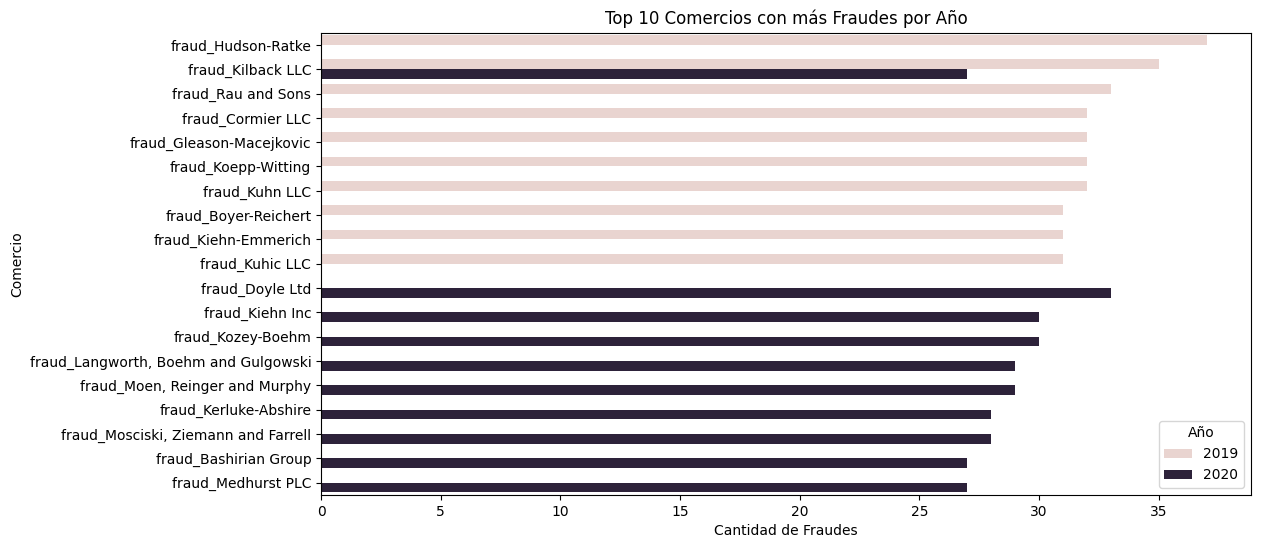

In [48]:
# Graficar los 10 comercios con más fraudes
top_merchants_by_year = top_merchants_by_year.sort_values(['year', 'Cantidad de Fraudes'], ascending=[True, False])
plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad de Fraudes', y='merchant', hue='year', data=top_merchants_by_year, dodge=True)
plt.title("Top 10 Comercios con más Fraudes por Año")
plt.xlabel("Cantidad de Fraudes")
plt.ylabel("Comercio")
plt.legend(title='Año')
plt.show()

# 🔍 1.7 Análisis de Distribución y Balanceo de Clases

### 📌 1.7.1 Distribución de la Variable Objetivo (is_fraud)

In [49]:
fraud_counts = df['is_fraud'].value_counts()
fraud_percentages = (fraud_counts / fraud_counts.sum()) * 100

balanceo_df = pd.DataFrame({
    'Clase': ['No Fraude', 'Fraude'],
    'Cantidad': fraud_counts.values,
    'Porcentaje (%)': fraud_percentages.round(2).values
})

balanceo_df


,Clase,Cantidad,Porcentaje (%)
0,No Fraude,1842743,99.48
1,Fraude,9651,0.52


C:\Users\Personal\AppData\Local\Temp\ipykernel_10420\2138708056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanceo_df['Clase'], y=balanceo_df['Cantidad'], palette='viridis')


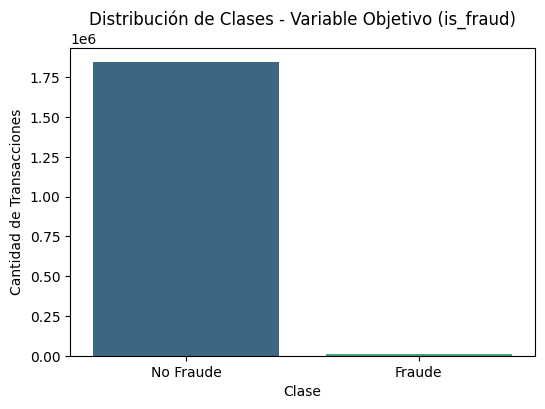

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(x=balanceo_df['Clase'], y=balanceo_df['Cantidad'], palette='viridis')
plt.title('Distribución de Clases - Variable Objetivo (is_fraud)')
plt.ylabel('Cantidad de Transacciones')
plt.show()


### 📌 1.7.2 Distribución de Transacciones por Categoría (category) y Fraude

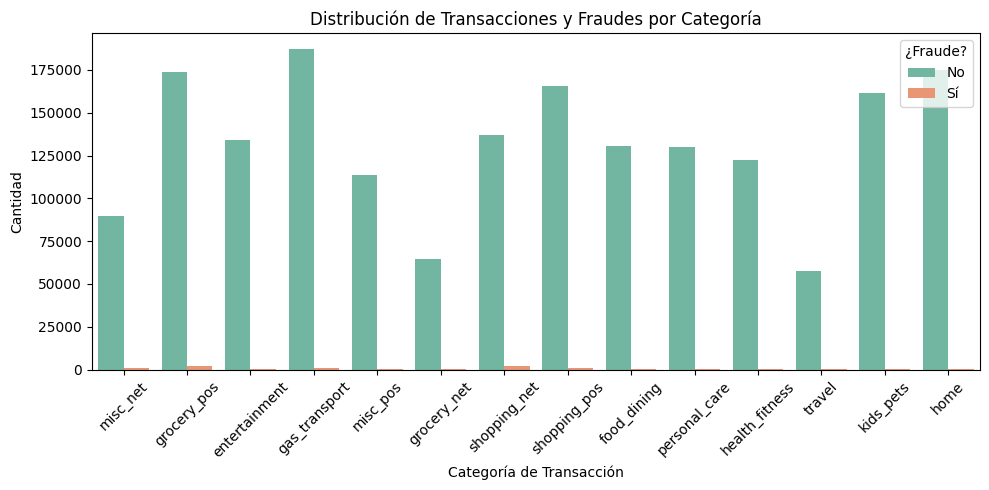

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='category', data=df, hue='is_fraud', palette='Set2')
plt.title('Distribución de Transacciones y Fraudes por Categoría')
plt.xticks(rotation=45)
plt.xlabel('Categoría de Transacción')
plt.ylabel('Cantidad')
plt.legend(title='¿Fraude?', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()


### 📌 1.7.3 Distribución de amount según tipo de transacción

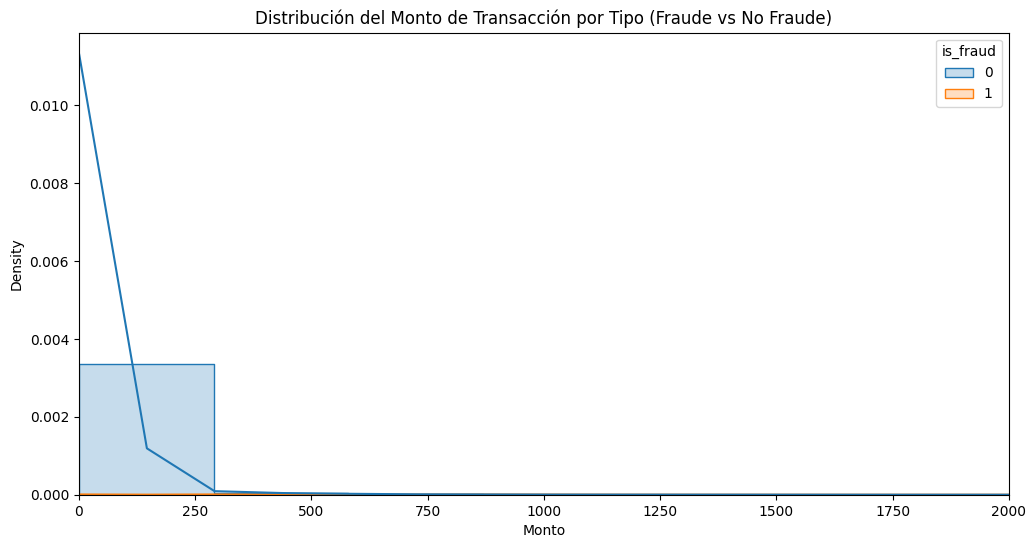

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=100, kde=True, element='step', stat='density')
plt.title('Distribución del Monto de Transacción por Tipo (Fraude vs No Fraude)')
plt.xlabel('Monto')
plt.xlim(0, 2000)  # Limita para ver mejor los datos (ajustable)
plt.show()


### 📌 1.7.4 Balanceo de clases en conjunto de entrenamiento/test

In [55]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Mostrar distribución
pd.DataFrame({
    'Train': y_train.value_counts(normalize=True).round(4),
    'Test': y_test.value_counts(normalize=True).round(4)
})


,Train,Test
is_fraud,,
0,0.9948,0.9948
1,0.0052,0.0052


# 🛠️ 2. Ingeniería de Variables

### 🎯 Objetivo:
Crear variables que capturen el historial de fraude por comercio, y que nos permitan priorizar aquellos comercios con antecedentes fraudulentos, así como otras variables contextuales que puedan enriquecer el modelo.

### ✅ 2.1 Conteo histórico de fraudes por comercio

📌 Interpretación:
Esta columna nos dice cuántos fraudes anteriores ha tenido ese comercio antes de esta transacción. Si el valor es alto, podría ser un indicador de riesgo.

In [59]:
# Ordenar el dataset por tiempo para mantener la secuencia temporal
df = df.sort_values(by=['unix_time', 'merchant'])

# Crear variable acumulada de fraudes por merchant 
df['fraudes_previos_en_merchant'] = df.groupby('merchant').is_fraud.cumsum() - df.is_fraud

# Para verificar los resultados
print("Primeras filas con los fraudes previos:")
print(df[['merchant', 'is_fraud', 'fraudes_previos_en_merchant']].head(10))

Primeras filas con los fraudes previos:
                             merchant  is_fraud  fraudes_previos_en_merchant
0          fraud_Rippin, Kub and Mann         0                            0
1     fraud_Heller, Gutmann and Zieme         0                            0
2                fraud_Lind-Buckridge         0                            0
3  fraud_Kutch, Hermiston and Farrell         0                            0
4                 fraud_Keeling-Crist         0                            0
5    fraud_Stroman, Hudson and Erdman         0                            0
6               fraud_Rowe-Vandervort         0                            0
7                fraud_Corwin-Collins         0                            0
8                    fraud_Herzog Ltd         0                            0
9   fraud_Schoen, Kuphal and Nitzsche         0                            0


### ✅ 2.2 Flag binario: ¿Este comercio ha tenido algún fraude antes?
📌 Interpretación:
Este es un indicador binario (0/1) que refleja si el comercio ya tiene antecedentes de fraude.

0 = no tiene antecedentes de fraude

1 = si tiene antecedentes de fraude

In [61]:
df['merchant_con_historial_fraude'] = (df['fraudes_previos_en_merchant'] > 0).astype(int)
# Verificar la creación de la nueva variable
print("Primeras filas con la nueva variable de historial de fraude:")
print(df[['merchant', 'is_fraud', 'fraudes_previos_en_merchant', 'merchant_con_historial_fraude']].head(10))


Primeras filas con la nueva variable de historial de fraude:
                             merchant  is_fraud  fraudes_previos_en_merchant  \
0          fraud_Rippin, Kub and Mann         0                            0   
1     fraud_Heller, Gutmann and Zieme         0                            0   
2                fraud_Lind-Buckridge         0                            0   
3  fraud_Kutch, Hermiston and Farrell         0                            0   
4                 fraud_Keeling-Crist         0                            0   
5    fraud_Stroman, Hudson and Erdman         0                            0   
6               fraud_Rowe-Vandervort         0                            0   
7                fraud_Corwin-Collins         0                            0   
8                    fraud_Herzog Ltd         0                            0   
9   fraud_Schoen, Kuphal and Nitzsche         0                            0   

   merchant_con_historial_fraude  
0                      

### ✅ 2.3 Ratio de fraudes por comercio (histórico hasta la transacción)
📌 Interpretación:
Esta variable expresa la proporción histórica de fraudes en un comercio. Útil para ver si, aunque haya muchos fraudes, también hay muchas transacciones (lo que podría suavizar el impacto).

In [62]:
# Calcular número total de transacciones por comercio hasta el momento
df['transacciones_previas_en_merchant'] = (
    df.groupby('merchant')
    .cumcount()
)

# Evitar división por cero
df['ratio_fraudes_en_merchant'] = np.where(
    df['transacciones_previas_en_merchant'] > 0,
    df['fraudes_previos_en_merchant'] / df['transacciones_previas_en_merchant'],
    0
)
